1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import linalg as la
import itertools
from scipy.spatial.transform import Rotation as R
#%precision 4

(3, 2000)
eigenvalues eigendecomposition:  [ 2.80018024e+01 -2.25637731e-17  1.89390316e+00]
eigenvectors eigendecomposition: 
  [[-0.11060799 -0.81649658  0.56665616]
 [-0.58340123 -0.40824829 -0.70212273]
 [-0.80461722  0.40824829  0.43118959]] 

eigenvalues from SVD:  [2.80406436e+01 1.89392411e+00 8.27705386e-32]
eigenvectors from SVD: 
  [[-0.11062756  0.56665234 -0.81649658]
 [-0.58337699 -0.70214288 -0.40824829]
 [-0.80463211  0.43116181  0.40824829]] 

[[2.80406436e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.89392411e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.27705386e-32]] 

[9.36731202e-01 6.32687977e-02 2.76504874e-33] 

0.9367312023259411 1.0 

The principal component expresses the 93.67 % of the variability of the dataset
The main two principal components express the 100.00 % of the variability of the dataset so we can reduce the dimensionality of the dataset and focus on the two components associated. 

[2.80406436e+01 1.64819318e-16 1.89392411e+00] 


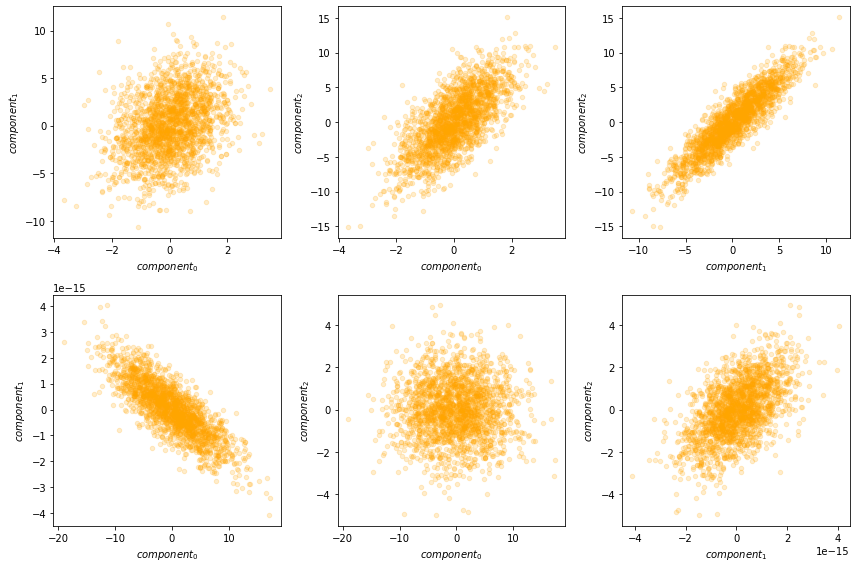

In [7]:
N = 2000
x1 = np.random.normal(loc = 0, scale = 1, size = N)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = N)
x3 = 2*x1 + x2

data = np.array((x1, x2, x3))
print(data.shape)
cov_matrix = np.cov(data)
egvl, egvt = la.eig(cov_matrix)
print("eigenvalues eigendecomposition: ", np.real_if_close(egvl))
print("eigenvectors eigendecomposition: \n ", egvt, "\n")


U, D, Vt = la.svd(data)
l_svd = D**2/(N-1)
V_svd = U
print("eigenvalues from SVD: ", np.real_if_close(l_svd))
print("eigenvectors from SVD: \n ", U, "\n")

diag = np.diag(l_svd)
print(diag, "\n")

trace = np.trace(diag)
perc = np.array([x/trace for x in l_svd]) 
print(perc, "\n")


main_perc1, main_perc2 = perc[0], perc[0]+perc[1]
print(main_perc1, main_perc2, "\n")

print("The principal component expresses the %.2f %% of the variability of the dataset" %(np.real_if_close(main_perc1)*100))
print("The main two principal components express the %.2f %% of the variability of the dataset" %(np.real_if_close(main_perc2)*100),
        "so we can reduce the dimensionality of the dataset and focus on the two components associated. \n")


#rotate data, remeber the mean is 0 in all cases
l0, V0 = np.linalg.eig(np.dot(data, data.T)/(N-1))
print(l0, "\n")
print(V0, "\n")

datap = np.dot(V0.T, data)

print("rotated data: \n", datap)

data_drop = datap.copy()

data_drop = np.delete(data_drop, np.s_[1], axis = 0)
print("data after drop: \n", data_drop)


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

def plotdata (data, idx1, idx2, row, col):
    ax[row, col].scatter(data[idx1, :], data[idx2, :], 20, "orange", "o", alpha = 0.2)
    ax[row, col].set_xlabel("$ component_%s $" %(idx1))
    ax[row, col].set_ylabel("$ component_%s $" %(idx2))

idx = 0

for pair in itertools.combinations((0, 1, 2), 2):
    plotdata(data, pair[0], pair[1], 0, idx)
    plotdata(datap, pair[0], pair[1], 1, idx)
    idx += 1

plt.tight_layout()
plt.show()

**Comment:**

We can see that in the eigenvalue decomposition and in the SVD the eigenvectors are equal or really close and two eigenvalues are equal but the third is different. However, we can see that it close to zero: the difference in the result could be due to the machine or to the algorithm, which can be less stable when working with numbers close to 0.

The principal components are just the first one and the third one. The ratio of the second is clearly negligible. We can say we expected this result, as long as a component in the original dataset can be written as a linear combination of the first two. So, keeping the first and second component, we are able to retain more than 99%% of the total variability

About the variability of the dataset, we can see that it is mostly expressed through the principal component. This is actually expected since we know that x2 is defined throgh x1 and x3 is just the sum of x1 and x2, so the features in the dataset are not independent.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [3]:
sigma = 1./50
noise = np.random.normal(loc = 0, scale = sigma, size = (10, N))
new_data = np.concatenate((data, noise), axis = 0)
print(new_data.shape)

cov_matrix = np.cov(new_data)

egvl, egvt = la.eig(cov_matrix)
print("eigenvalues eigendecomposition: ", np.real_if_close(egvl))
#print("eigenvectors eigendecomposition: \n ", egvt, "\n")

U, D, V = la.svd(new_data)
l_svd = D**2/(N-1)
V_svd = U
print("eigenvalues from SVD: ", np.real_if_close(l_svd))
print("eigenvectors from SVD: \n ", U, "\n")

diag = np.diag(l_svd)
print(diag, "\n")

trace = np.trace(diag)
perc = np.array([x/trace for x in l_svd]) 
print(perc, "\n")


main_perc1, main_perc2 = perc[0], perc[0]+perc[1]
print(main_perc1, main_perc2, "\n")

print("The principal component expresses the %.2f %% of the variability of the dataset" %(np.real_if_close(main_perc1)*100))
print("The main two principal components express the %.2f %% of the variability of the dataset" %(np.real_if_close(main_perc2)*100),
        "so we can reduce the dimensionality of the dataset and focus on the two components associated. \n")

(13, 2000)
eigenvalues eigendecomposition:  [2.70134814e+01 2.02138131e+00 3.28324753e-15 4.43349540e-04
 3.53167580e-04 4.31559740e-04 4.21123066e-04 4.10371527e-04
 3.70015558e-04 3.76405772e-04 3.85549417e-04 3.94112430e-04
 3.92604608e-04]
eigenvalues from SVD:  [2.70134834e+01 2.02141879e+00 4.43455597e-04 4.31661774e-04
 4.21163750e-04 4.10458831e-04 3.94177813e-04 3.92797659e-04
 3.85589074e-04 3.76820664e-04 3.70089723e-04 3.53167715e-04
 3.06820093e-31]
eigenvectors from SVD: 
  [[-1.15438089e-01  5.65691532e-01 -2.12734212e-04  6.78844619e-05
  -5.98475331e-05  3.45994544e-04 -3.46536323e-04  1.17929765e-04
  -9.36814589e-05  3.53391893e-04 -1.13361730e-04 -1.33892726e-04
   8.16496581e-01]
 [-5.77390203e-01 -7.07073716e-01  1.82376735e-04 -1.69300254e-04
   6.75769541e-05 -3.80221787e-04  4.73168492e-04 -8.59558581e-05
   8.32300257e-05 -3.67268438e-04  1.56980949e-04  1.96138768e-04
   4.08248290e-01]
 [-8.08266382e-01  4.24309348e-01 -2.43091689e-04 -3.35313304e-05
  -5.21

**Comment:** We can see that the variability of the dataset is mainly in the first two principal components. We can see that the corresponding eigenvalues were also present in the original dataset, before adding the noise. This is because we imposed the variance of the noise to be much smaller than the original dataset variance, with the mean still 0, so little information is carried by the noise.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


(2500,)
(3, 2500)


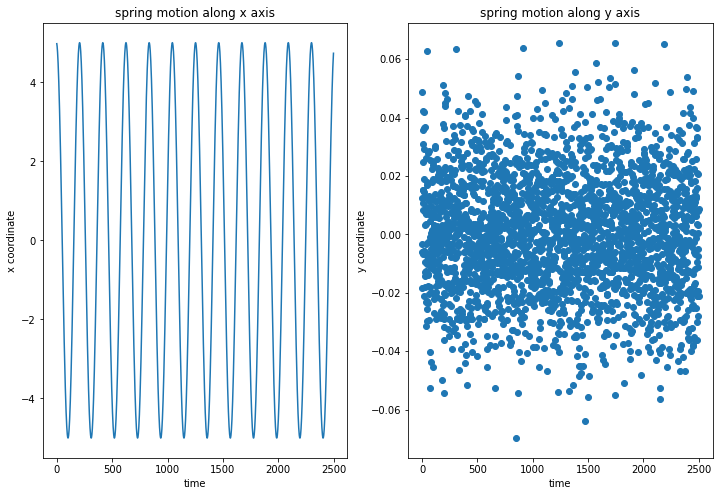

['x0-0', 'y0-0', 'z0-0', 'x45-45', 'y45-45', 'z45-45', 'x30-60', 'y30-60', 'z30-60', 'x60-120', 'y60-120', 'z60-120', 'x90-180', 'y90-180', 'z90-180']
eigenvalues from SVD: 
  [6.22100655e+01 2.00860630e-03 9.40693251e-31 4.10705081e-32
 2.38906650e-32 2.13179017e-32 1.87734917e-32 8.58672580e-33
 3.81312993e-33 2.59144604e-35 1.78967852e-36 9.16824630e-37
 4.72506888e-37 1.83933487e-63 3.76443459e-64]
variability of the dataset associated to the eigenvalue: 
  [9.99967714e-01 3.22864384e-05 1.51207505e-32 6.60169407e-34
 3.84019748e-34 3.42665022e-34 3.01766047e-34 1.38023461e-34
 6.12924418e-35 4.16550336e-37 2.87673823e-38 1.47370851e-38
 7.59509942e-39 2.95655609e-65 6.05097105e-66] 

0.9999677135616243 1.0 

The principal component expresses the 99.9968 % of the variability of the dataset


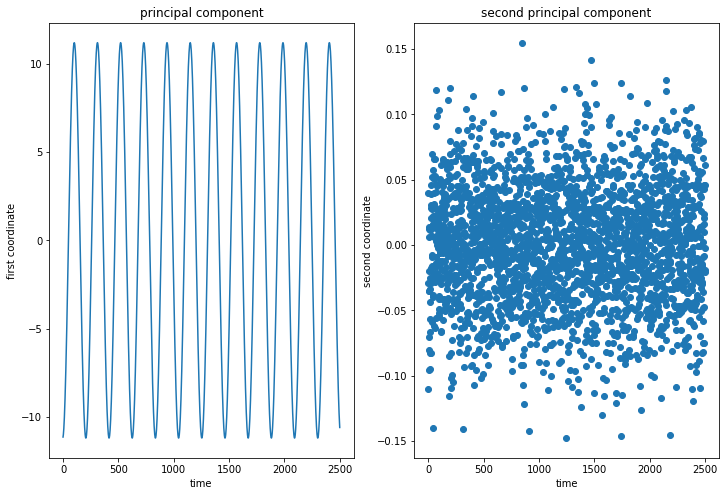

In [4]:
n = 2500
omega = 0.03
phase = 0.1
ampl = 5
std = 1./50

x = np.array([ampl*np.cos(omega*time + phase) for time in range(n)])
print(x.shape)
y = np.random.normal(loc = 0, scale = std, size = n)
z = np.zeros(n)
coord = np.array((x, y, z))
print(coord.shape)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


ax1.plot(np.arange(0, n, 1), coord[0, :])                                        
ax1.set_xlabel("time")
ax1.set_ylabel("x coordinate")
ax1.set_title("spring motion along x axis")
ax2.scatter(np.arange(0, n, 1), coord[1, :])                       
ax2.set_xlabel("time")
ax2.set_ylabel("y coordinate")
ax2.set_title("spring motion along y axis")


plt.show()

#we want to create data for different cameras so for different angles
#I create a pandas dataframe and choose angles for the cameras
names = []
couples = np.array([[0, 0], [45, 45], [30, 60], [60, 120], [90,180]])
df = np.zeros((n, 3*len(couples)))
for i in range(len(couples)):
    th = R.from_euler("x", couples[i, 0], degrees=True)
    ph = R.from_euler("z", couples[i, 1], degrees=True)
    rot = th*ph
    ang = rot.as_dcm()
    new_coord = np.dot(ang.T, coord).T
    df[:, 3*i : 3*i+3] = new_coord
    s = str(couples[i, 0]) + "-" + str(couples[i, 1])
    names.extend(("x"+s, "y"+s, "z"+s))

print(names)
    
data = pd.DataFrame(df, columns = names)

covar_matrix = np.cov(data.T)
U, D, Vt = la.svd(data.T)
l_svd = D**2/(n-1)
V_svd = U
print("eigenvalues from SVD: \n ", np.real_if_close(l_svd))
#print("eigenvectors from SVD: \n ", U, "\n")

diag = np.diag(l_svd)
#print(diag, "\n")

trace = np.trace(covar_matrix)
trace_svd = np.trace(diag)
perc = np.array([x/trace_svd for x in l_svd]) 
print("variability of the dataset associated to the eigenvalue: \n ", perc, "\n")

main_perc1, main_perc2 = perc[0], perc[0]+perc[1]
print(main_perc1, main_perc2, "\n")

print("The principal component expresses the %.4f %% of the variability of the dataset" %(np.real_if_close(main_perc1)*100))

#data rotation
names1 = [x+"-rot" for x in names]
df_rot = pd.DataFrame(np.dot(data, U), columns = names1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

ax1.plot(np.arange(0, n, 1), df_rot.iloc[:, 0])                                        
ax1.set_xlabel("time")
ax1.set_ylabel("first coordinate")
ax1.set_title("principal component")
ax2.scatter(np.arange(0, n, 1), df_rot.iloc[:, 1])                       
ax2.set_xlabel("time")
ax2.set_ylabel("second coordinate")
ax2.set_title("second principal component")

plt.show()


**Comment**:

First I made a plot of the motion of the spring along the x coordinate and along the y coordinate.
Then I created a dataset describing the motion of the spring along a given direction described by the angles $\theta$, $\phi$. 
After that I performed the PCA on the dataset created.

After the rotation we can see that the variability of the dataset is mostly expressed by the principal component, and excluding that only the second principal component brings a non negligible contribution.

I plotted the principal component and second principal component as function of time.

From the plot we can see that the principal component can still be described with a cosine function, with amplitude different from the one of the original dataset created corresponding to the direction (0, 0).
Comparing the second principal component to the motion along the y axis we can see that the behaviors are similar: there seems to be a rescaling and a reflection.
The first principal component is then related to the data recorded at angle (0, 0) in x direction, and the second principal component is related to the data collected in y direction.

The behavior can be explained thinking about the generation of the dataset: the different cameras record the same motion from different angles, so apart from the first one they do not actually record new information.
As for the first camera associated to the angles (0, 0), we imposed a random noise with little variance along the y axis, so the information related to the motion is actually mainly realted to the motion along the x axis, and little information is carried by the noise in y direction.

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 